###     读取卖场数据，按照以下要求完成练习：

    筛选商品子类为 Chairs 的数据，绘制折扣与数量之间每种组合出现的次数热力图，显示数字。

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
sh=pd.read_csv(r'C:\Users\YcAllenEffy\Desktop\国际卖场.csv')
df=sh.copy()
df

,订单号,订单日期,发货日期,运输等级,顾客编号,顾客名称,顾客类型,城市,州省,国家地区,...,商品编号,商品门类,商品子类,商品名称,总额,数量,折扣,营利,运费,订单优先级
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Dra?,Morocco,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Ju?rez,Chihuahua,Mexico,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [6]:
dfc=df[df['商品子类']=='Chairs'][['折扣','数量']]
dfc_piv=dfc.pivot_table(columns='折扣',index='数量',aggfunc=len)
dfc_piv.fillna(0,inplace=True)

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
#设置画图 中文字体初始化
sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})

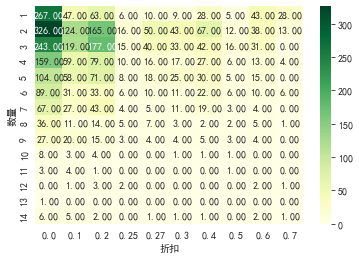

In [22]:
sns.heatmap( data=dfc_piv,  cmap='YlGn', annot=True, fmt='0.2f' )


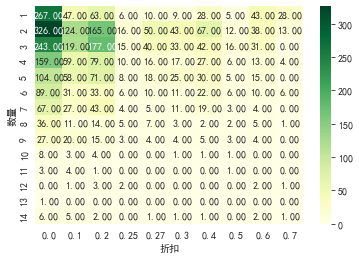

In [16]:
# 标准答案
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})
plt.rcParams['axes.unicode_minus'] = False

df = sh.copy()
dfc = df[df['商品子类']=='Chairs']
df_count = dfc[['折扣', '数量']].pivot_table(columns='折扣', index='数量', aggfunc=len)
df_count.fillna(0, inplace=True)
sns.heatmap( data=df_count, cmap='YlGn', annot=True, fmt='0.2f' )

###    读取卖场数据，按照以下要求完成练习：

    1. 筛选商品子类为 Art 的数据，绘制总额、运费、折扣、营利、数量之间的相关系数热力图。

    2. 设置图例最大值为0.9，最小值为-0.4，显示数值。

In [23]:
dfc2 = df[df['商品子类']=='Art'][['总额','运费','折扣','营利','数量']]
dfc2.corr()

,总额,运费,折扣,营利,数量
总额,1.000000,0.730464,-0.228132,0.580392,0.636225
运费,0.730464,1.000000,-0.164577,0.442265,0.477445
折扣,-0.228132,-0.164577,1.000000,-0.541474,-0.071567
营利,0.580392,0.442265,-0.541474,1.000000,0.279385
数量,0.636225,0.477445,-0.071567,0.279385,1.000000


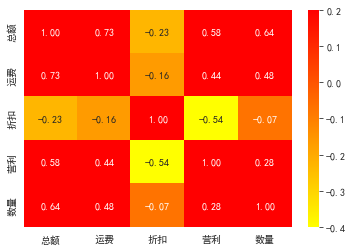

In [30]:
sns.heatmap(data=dfc2.corr(),cmap='autumn_r',annot=True, fmt='0.2f', vmax=0.2, vmin=-0.4)

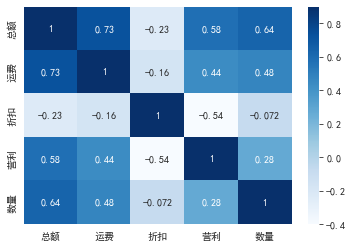

In [26]:
# 标准答案
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})
plt.rcParams['axes.unicode_minus'] = False

df = sh.copy()
dfc = df[df['商品子类']=='Art']
dfc = dfc[['总额', '运费', '折扣', '营利', '数量']]
dfc = dfc.corr()
sns.heatmap( data=dfc, cmap='Blues', vmax=0.9, vmin=-0.4, annot=True)